In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import pyaudio
import wave
import time
import sys
import heapq

from scripts.ioaudio import sigToWav

from scripts.graph import qp,darken

from IPython.core.display import display, HTML
import pandas as pd
from scripts.fftgraph import getfft, xfft, detectNMaxFreq,low_pass_index
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
wavefile=wave.open("low.wav","rb")


In [3]:
wavefile.rewind()
print(wavefile.getframerate())
nframes=wavefile.getnframes()


44100


In [4]:
buf=np.frombuffer(wavefile.readframes(nframes),np.int16)
buf=buf[int(nframes/2.12):int(nframes*0.75)]

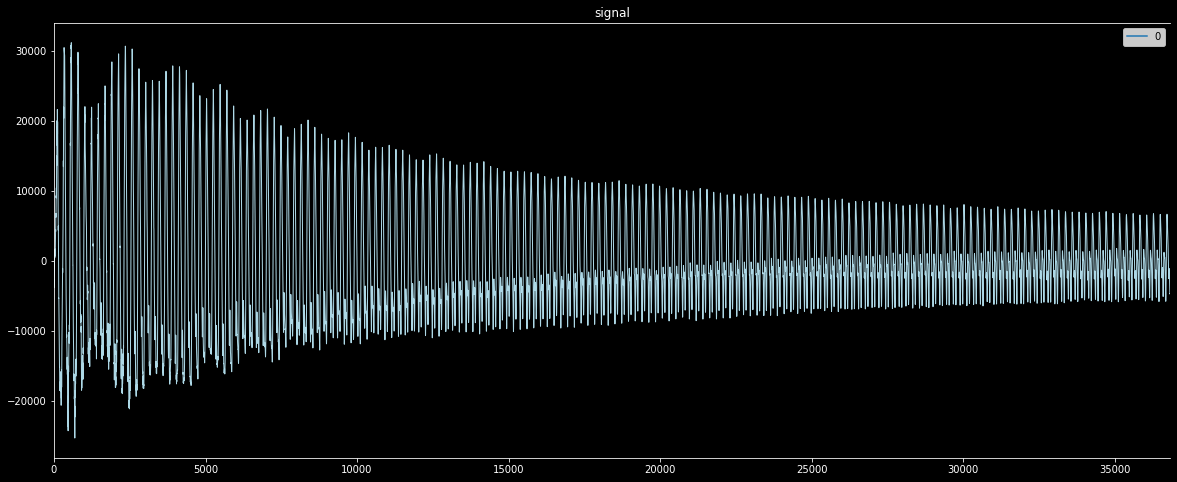

In [5]:
#adjust the coeffs so that you only get relevant signal

darken(qp(buf),title="signal")

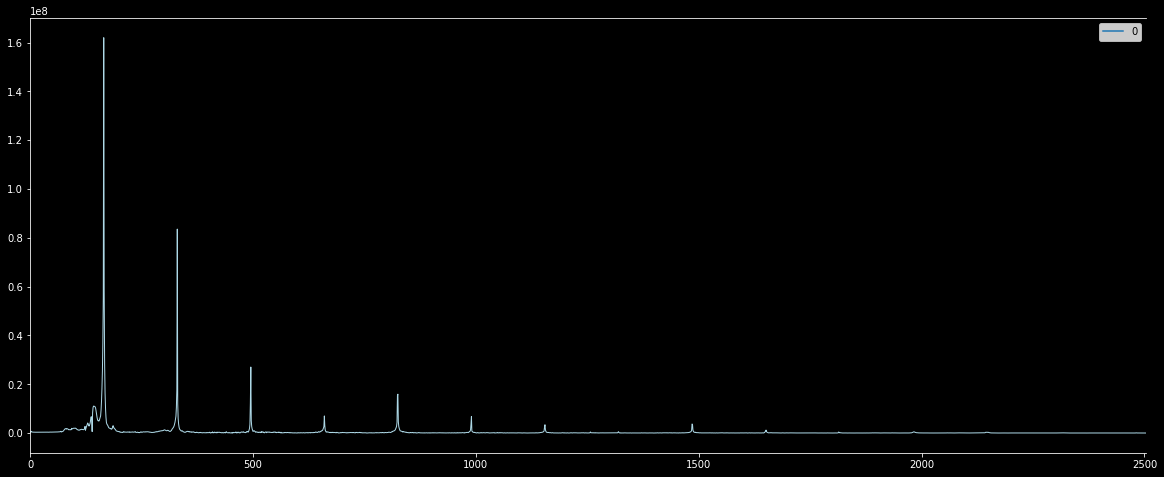

In [23]:
#get the fft and split the domain so that we don't get high frequency noise
size=len(buf)#nsamples

fft=getfft(buf)
xfr=low_pass_index(fft,3000)
    
fft=fft[0:len(xfr)]
lfft=np.log(fft)
darken(qp(fft))
#darken(qp(lfft))

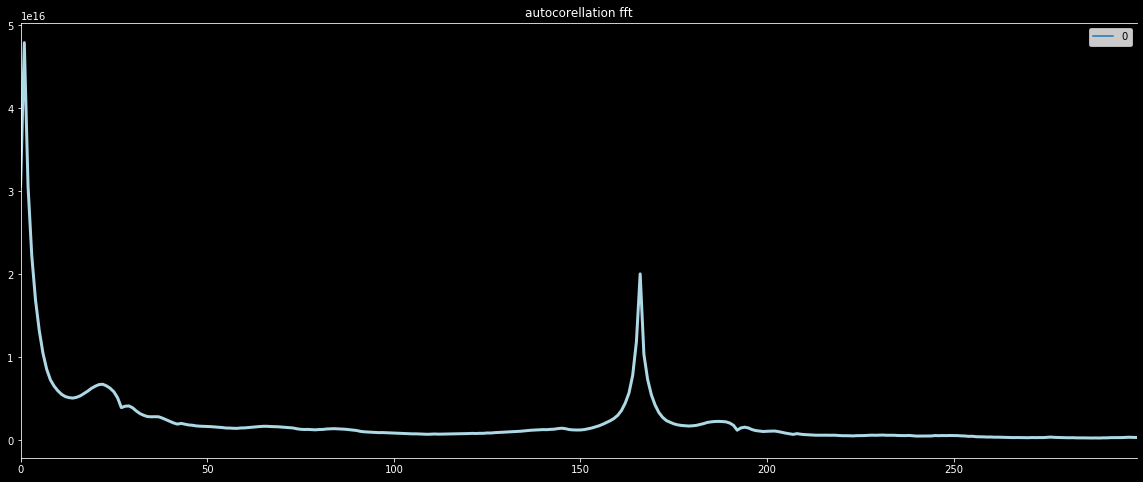

In [12]:
corf=np.correlate(fft,fft,"same")
cbuf=np.correlate(buf,buf,"same")
indx=int((len(corf)-1)/2)
darken(qp(corf[indx:indx+300]),"autocorellation fft",3.0)


In [21]:
corfcrop=corf[int((len(corf))/2):]#to get only the interesting side
xm,ym=detectNMaxFreq(corfcrop,min(corfcrop),d=100)# 50: to remove thewobbly stuff

if len(xm)>=6:
    im=heapq.nlargest(30,range(len(ym)),ym.__getitem__)
    
    xm=[xm[i] for i in im]
    ym=[ym[i] for i in im]
xm= [xfr[xi] for xi in xm]

print(np.sort(np.array(xm)))
print(ym)

[  25.15209125  197.62357414  395.24714829  592.87072243  790.49429658
  988.11787072 1185.74144487 1383.36501901 1582.18631179 1779.80988593
 1978.63117871 2177.45247148 2376.27376426 2584.67680608 2782.30038023
 2978.72623574 3176.34980989 3375.17110266 3573.99239544 3774.01140684
 3976.42585551 4175.24714829 4380.05703422 4580.07604563 4784.88593156
 4982.5095057  5186.121673   5389.7338403  5800.5513308  6002.96577947]
[2.0071635261213756e+16, 7512898642334584.0, 6774056037929204.0, 5201168536954669.0, 3949364391176264.5, 2008287810635615.5, 1168938686098347.2, 1143512974688230.2, 628202040022932.9, 403771366599545.6, 369988679279858.44, 318355836793049.9, 310281400751818.2, 282457131081828.8, 255001127252007.75, 228858151914555.16, 208462271389543.12, 186773519058271.7, 175364235807772.53, 173584668333492.75, 171401759930874.97, 169776340216319.53, 165524894782642.78, 158579905502896.56, 129629753833636.0, 122233671842256.06, 96006188074977.47, 86639140886619.05, 84439344023953.23

[0.0, 1.1977186311787071, 2.3954372623574143, 3.5931558935361214, 4.7908745247148286, 5.988593155893536, 7.186311787072243, 8.38403041825095, 9.581749049429657, 10.779467680608365, 11.977186311787072, 13.17490494296578, 14.372623574144486, 15.570342205323193, 16.7680608365019, 17.96577946768061, 19.163498098859314, 20.361216730038024, 21.55893536121673, 22.756653992395435, 23.954372623574145, 25.15209125475285, 26.34980988593156, 27.547528517110266, 28.74524714828897, 29.94296577946768, 31.140684410646386, 32.338403041825096, 33.5361216730038, 34.73384030418251, 35.93155893536122, 37.12927756653992, 38.32699619771863, 39.52471482889734, 40.72243346007605, 41.92015209125475, 43.11787072243346, 44.31558935361217, 45.51330798479087, 46.71102661596958, 47.90874524714829, 49.10646387832699, 50.3041825095057, 51.50190114068441, 52.69961977186312, 53.89733840304182, 55.09505703422053, 56.29277566539924, 57.49049429657794, 58.68821292775665, 59.88593155893536, 61.083650190114064, 62.2813688212

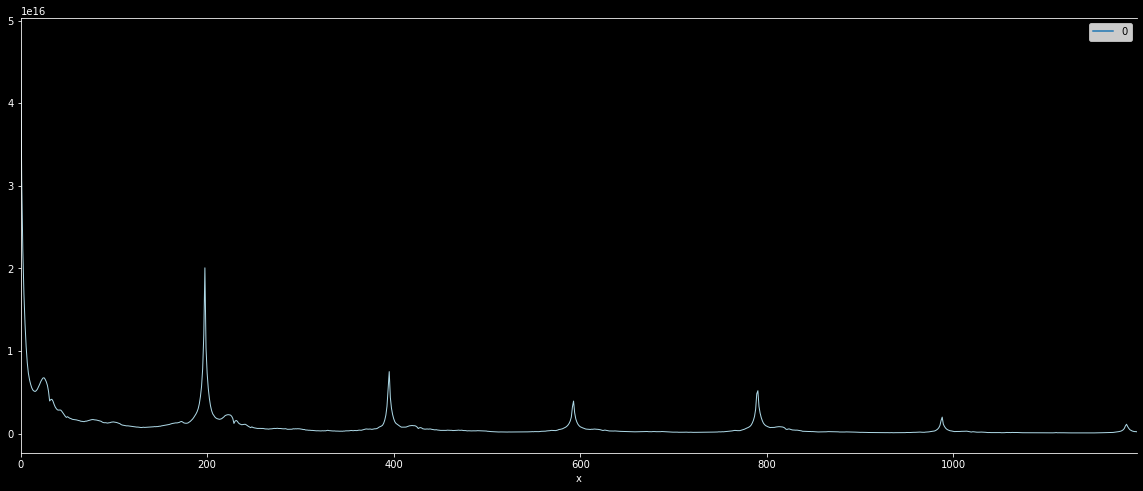

In [15]:
lim=1000
darken(qp(corfcrop[:1000],xfr[:1000]))


In [22]:
[197.62*(n+1) for n in range(15)]

[197.62,
 395.24,
 592.86,
 790.48,
 988.1,
 1185.72,
 1383.3400000000001,
 1580.96,
 1778.58,
 1976.2,
 2173.82,
 2371.44,
 2569.06,
 2766.6800000000003,
 2964.3]

In [11]:
[  65  165  330  495  660  825  990 1155 1321 1486 1818 2818 3486 4160
 4330]

SyntaxError: invalid syntax (<ipython-input-11-1dc16023ac5b>, line 1)